In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [4]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

df = pdr.get_data_yahoo('NFLX ', start='2010-01-01', end='2022-12-23')

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...
2022-12-16,288.760010,294.720001,288.700012,290.709991,290.709991,14080000
2022-12-19,289.730011,292.250000,286.130005,288.299988,288.299988,6163700
2022-12-20,281.239990,289.279999,280.809998,288.190002,288.190002,6918100


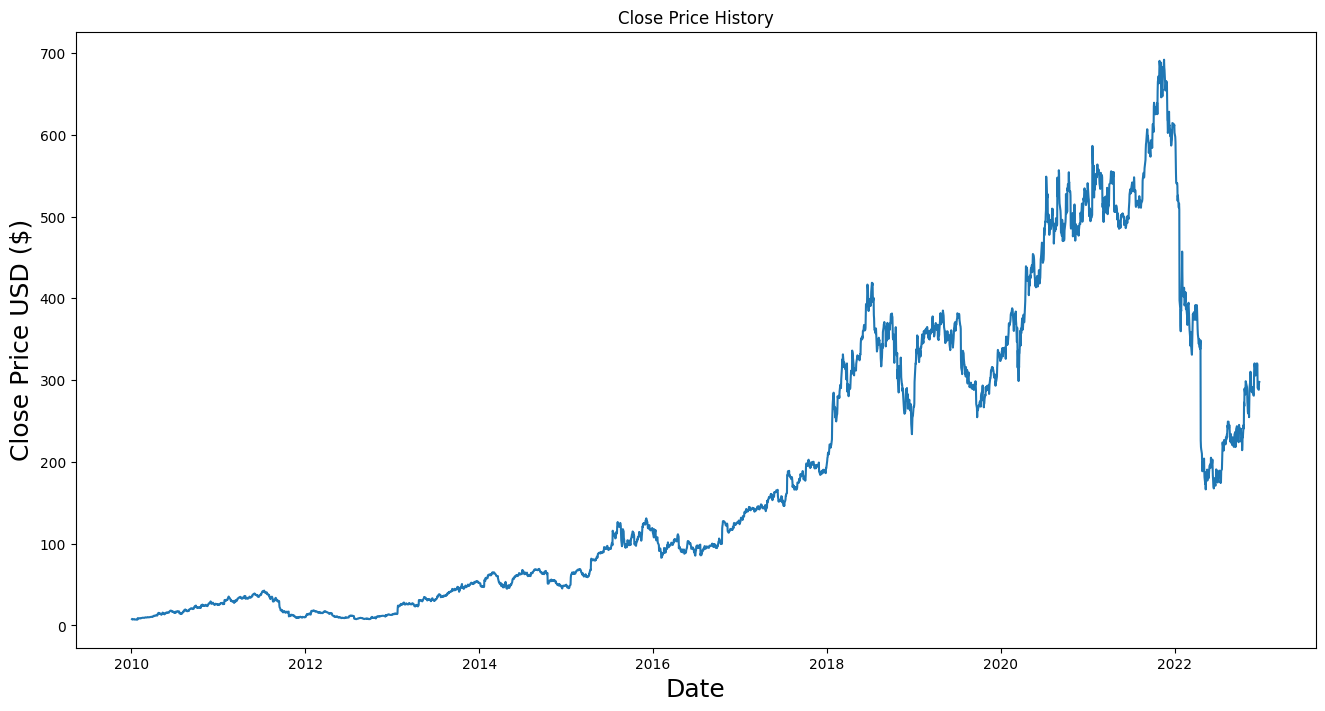

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [6]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

2614

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00090763],
       [0.00049659],
       [0.00087425],
       ...,
       [0.41066622],
       [0.42493583],
       [0.42462912]])

In [8]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00090763, 0.00049659, 0.00087425, 0.00068229, 0.00087007,
       0.00085547, 0.00067603, 0.00100778, 0.00038809, 0.00037974,
       0.00043191, 0.00044025, 0.00042982, 0.00036723, 0.        ,
       0.00017109, 0.00038392, 0.00290233, 0.0027375 , 0.00248294,
       0.00265404, 0.0026749 , 0.00233897, 0.0024433 , 0.00245582,
       0.00271246, 0.00257892, 0.0029691 , 0.00293154, 0.00328207,
       0.00320905, 0.0035408 , 0.00365556, 0.00336762, 0.00317566,
       0.00324661, 0.00343856, 0.00353037, 0.00429194, 0.00414172,
       0.00384335, 0.00393933, 0.00386421, 0.00407912, 0.00434202,
       0.00462161, 0.00460283, 0.00435037, 0.00427108, 0.00448599,
       0.0045465 , 0.00446721, 0.00444843, 0.00495754, 0.00497215,
       0.00484904, 0.00509316, 0.00525174, 0.00516828, 0.00541031])]
[0.005134893152282691]

[array([0.00090763, 0.00049659, 0.00087425, 0.00068229, 0.00087007,
       0.00085547, 0.00067603, 0.00100778, 0.00038809, 0.00037974,
       0.00043191, 0.00044025, 0.0

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2554, 60, 1)

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
2554/2554 [==============================] - 88s 33ms/step - loss: 7.9191e-04
Epoch 2/2
2554/2554 [==============================] - 87s 34ms/step - loss: 3.0691e-04


In [14]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test =  dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 18ms/step


In [17]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 824.554612607109
R-squared: 0.9587473295167118
Mean Absolute Error: 24.27439686423239
Root Mean Squared Error: 28.715058986655574


<ipython-input-18-858541529963>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


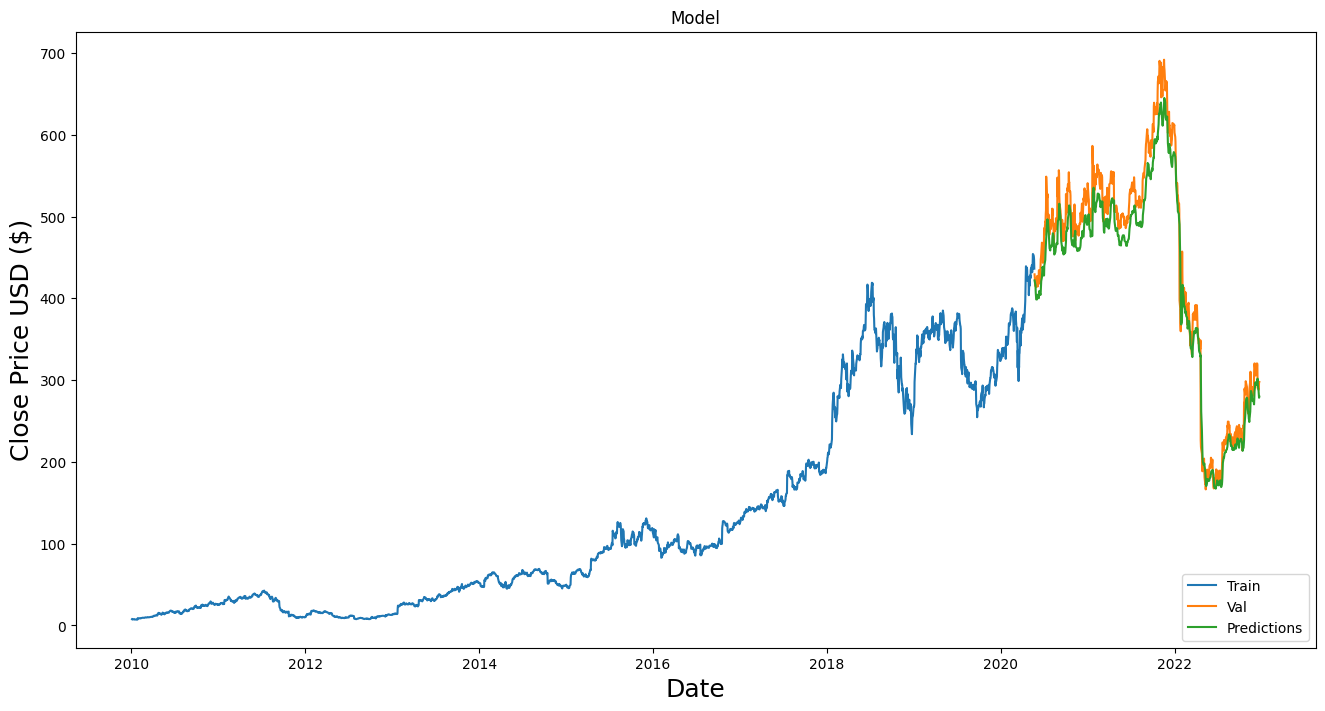

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()